In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("tortilla_prices.csv")

print(df.head())

                 State            City  Year  Month  Day         Store type  \
0       Aguascalientes  Aguascalientes  2007      1   10  Mom and Pop Store   
1      Baja California        Mexicali  2007      1   10  Mom and Pop Store   
2      Baja California         Tijuana  2007      1   10  Mom and Pop Store   
3  Baja California Sur          La Paz  2007      1   10  Mom and Pop Store   
4             Campeche        Campeche  2007      1   10  Mom and Pop Store   

   Price per kilogram  
0                 9.9  
1                 NaN  
2                10.0  
3                10.0  
4                10.0  


In [3]:
df.describe()

,Year,Month,Day,Price per kilogram
count,278886.000000,278886.000000,278886.000000,272496.000000
mean,2015.080015,6.384781,15.951955,12.054586
std,4.912392,3.440216,8.755248,4.336487
min,2007.000000,1.000000,1.000000,0.000000
25%,2011.000000,3.000000,8.000000,9.570000
50%,2015.000000,6.000000,16.000000,11.170000
75%,2019.000000,9.000000,24.000000,14.000000
max,2024.000000,12.000000,31.000000,31.000000


In [4]:
df.shape

(278886, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278886 entries, 0 to 278885
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State               278886 non-null  object 
 1   City                278886 non-null  object 
 2   Year                278886 non-null  int64  
 3   Month               278886 non-null  int64  
 4   Day                 278886 non-null  int64  
 5   Store type          278886 non-null  object 
 6   Price per kilogram  272496 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 14.9+ MB


de aqui estas probando otra cosa


In [6]:
df.head()

,State,City,Year,Month,Day,Store type,Price per kilogram
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.9
1,Baja California,Mexicali,2007,1,10,Mom and Pop Store,NaN
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.0
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.0
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.0


In [7]:
df['Price per kilogram'] = df['Price per kilogram'].fillna(method='ffill')

In [8]:
df.head()

,State,City,Year,Month,Day,Store type,Price per kilogram
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.9
1,Baja California,Mexicali,2007,1,10,Mom and Pop Store,9.9
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.0
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.0
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.0


<Axes: >

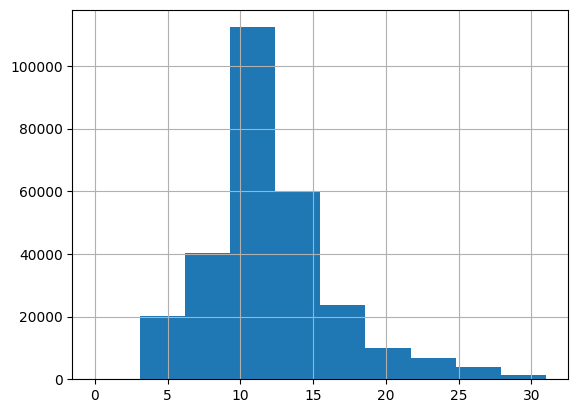

In [9]:
df['Price per kilogram'].hist()

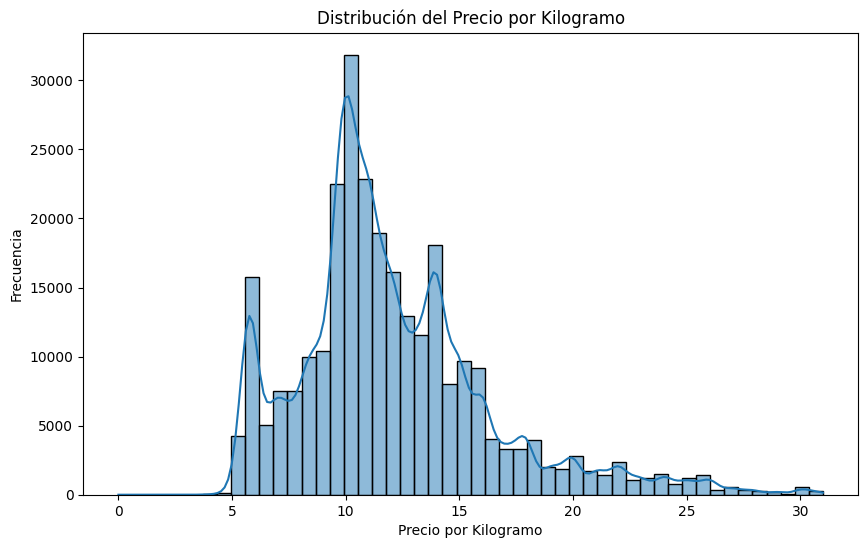

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price per kilogram'], bins=50, kde=True)
plt.title('Distribución del Precio por Kilogramo')
plt.xlabel('Precio por Kilogramo')
plt.ylabel('Frecuencia')
plt.show()

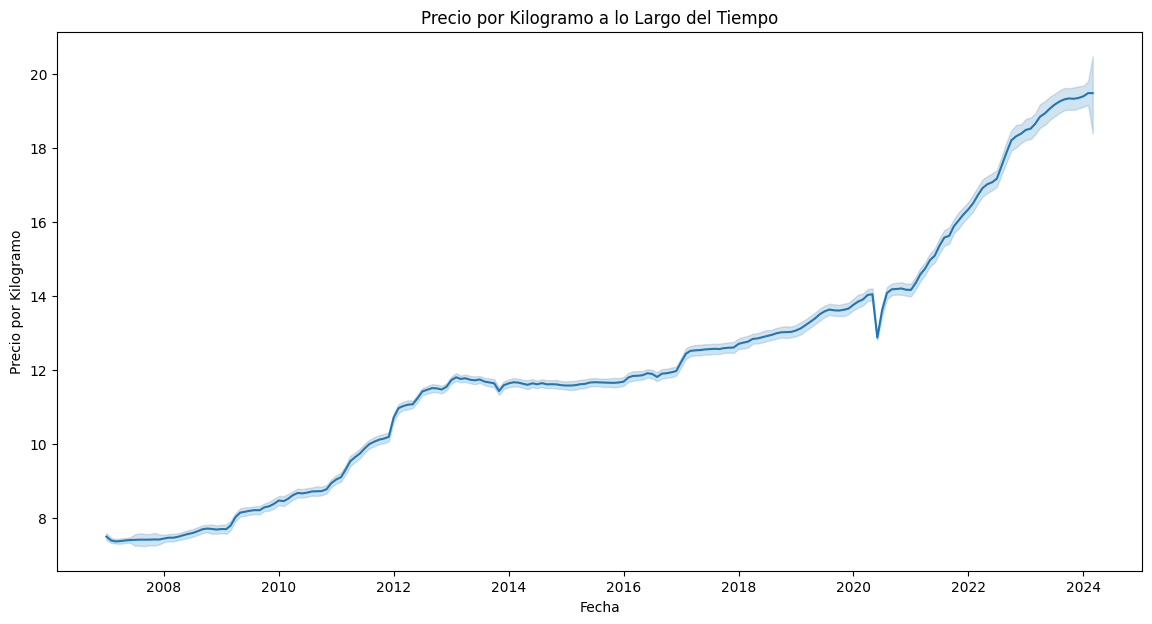

In [ ]:
df["Date"]
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Date', y='Price per kilogram')
plt.title('Precio por Kilogramo a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio por Kilogramo')
plt.show()

array([[<Axes: title={'center': 'Price per kilogram'}>,
        <Axes: title={'center': 'Date'}>]], dtype=object)

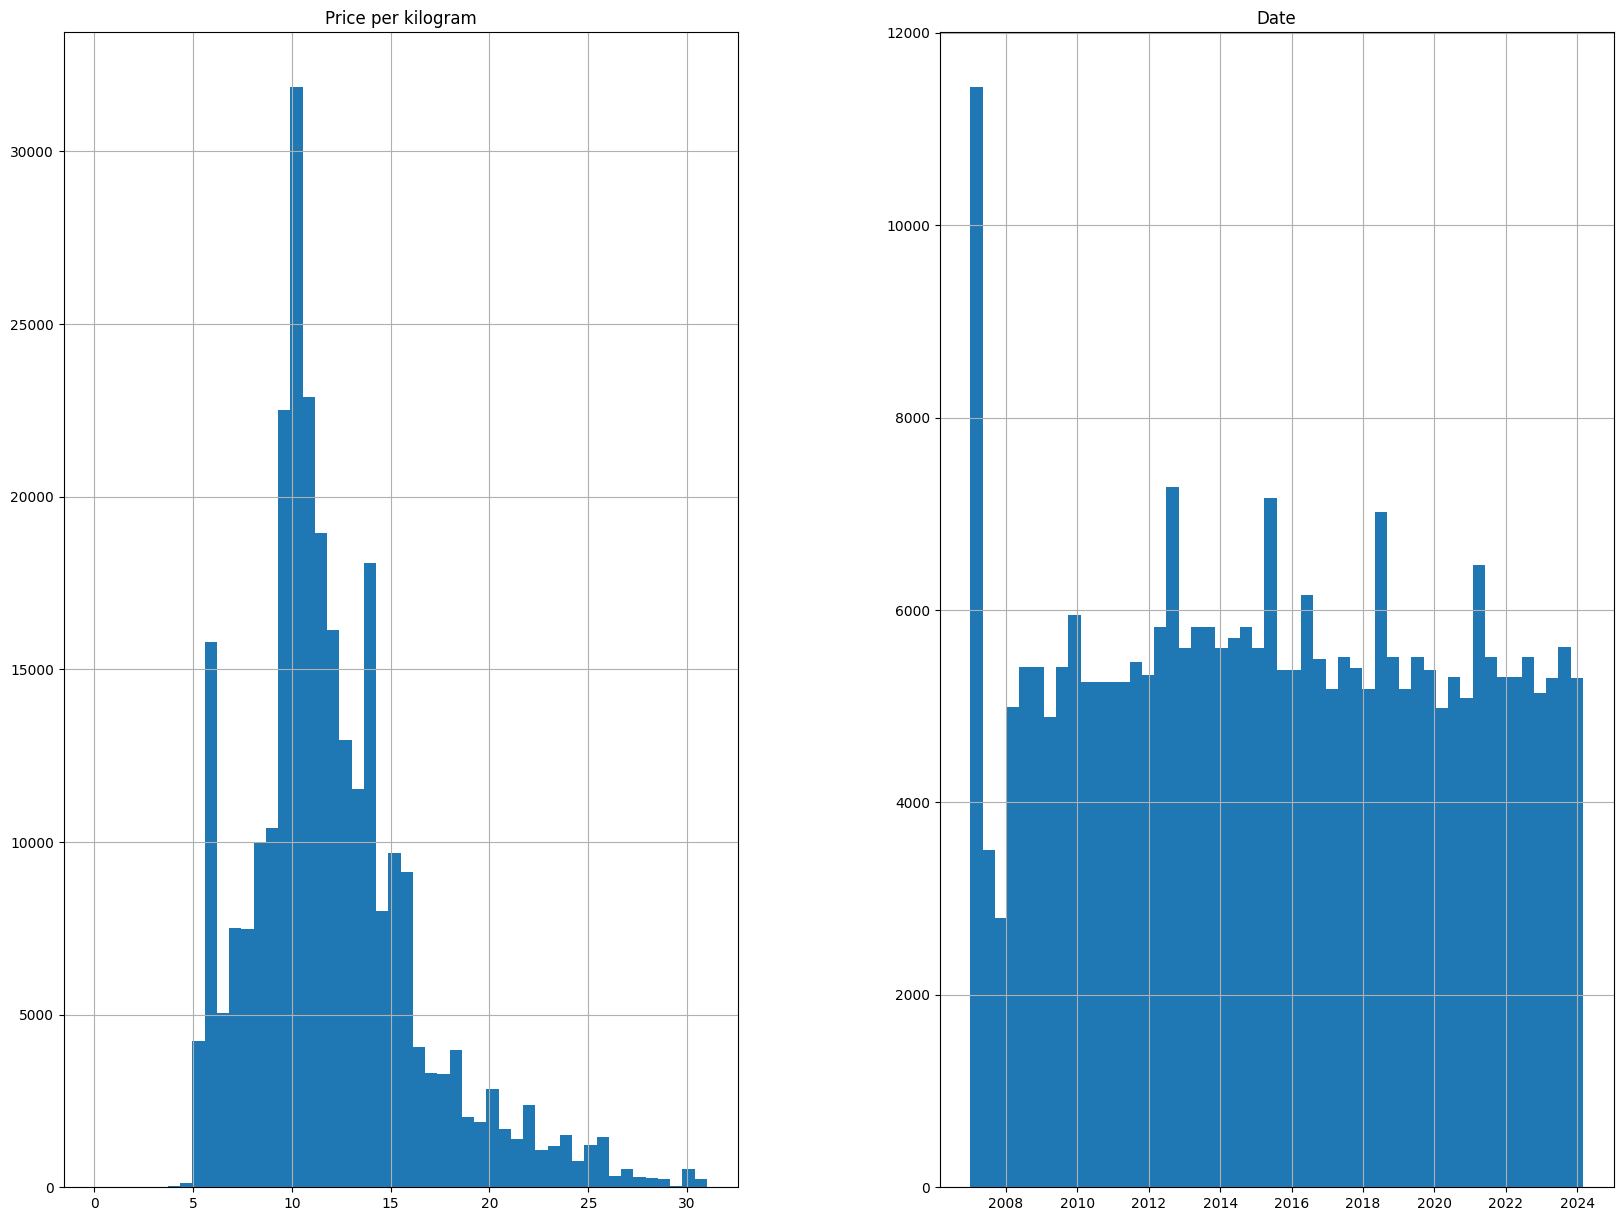

In [ ]:
df.hist(bins=50, figsize=(20,15))

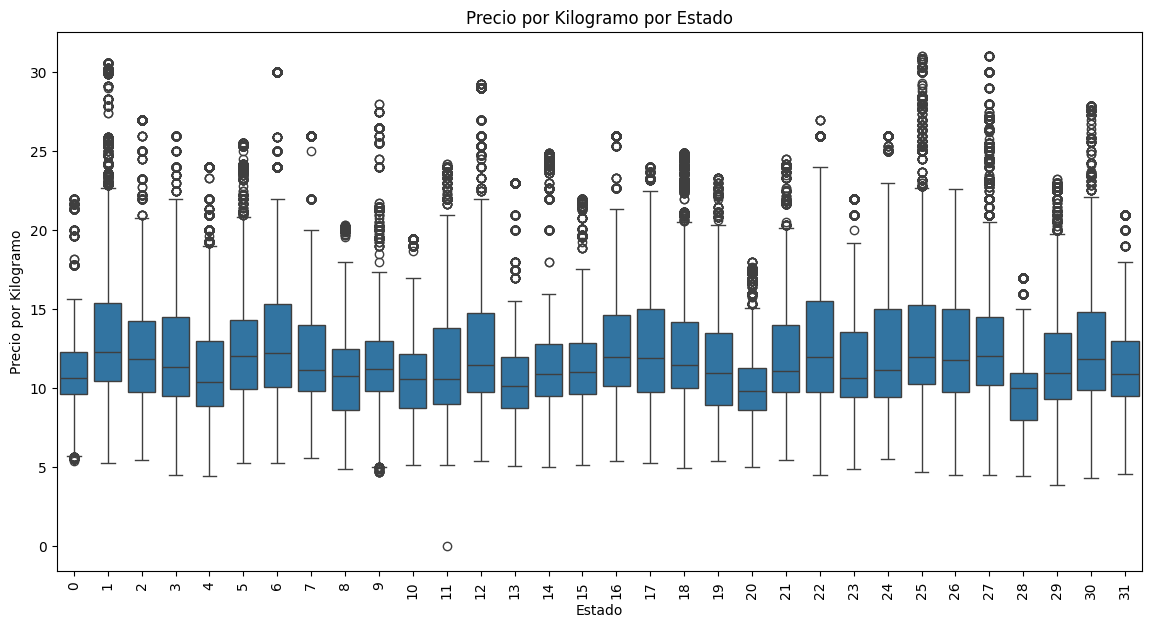

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='State', y='Price per kilogram', data=df)
plt.xticks(rotation=90)
plt.title('Precio por Kilogramo por Estado')
plt.xlabel('Estado')
plt.ylabel('Precio por Kilogramo')
plt.show()

array([[<Axes: xlabel='State', ylabel='State'>,
        <Axes: xlabel='City', ylabel='State'>,
        <Axes: xlabel='Store type', ylabel='State'>],
       [<Axes: xlabel='State', ylabel='City'>,
        <Axes: xlabel='City', ylabel='City'>,
        <Axes: xlabel='Store type', ylabel='City'>],
       [<Axes: xlabel='State', ylabel='Store type'>,
        <Axes: xlabel='City', ylabel='Store type'>,
        <Axes: xlabel='Store type', ylabel='Store type'>]], dtype=object)

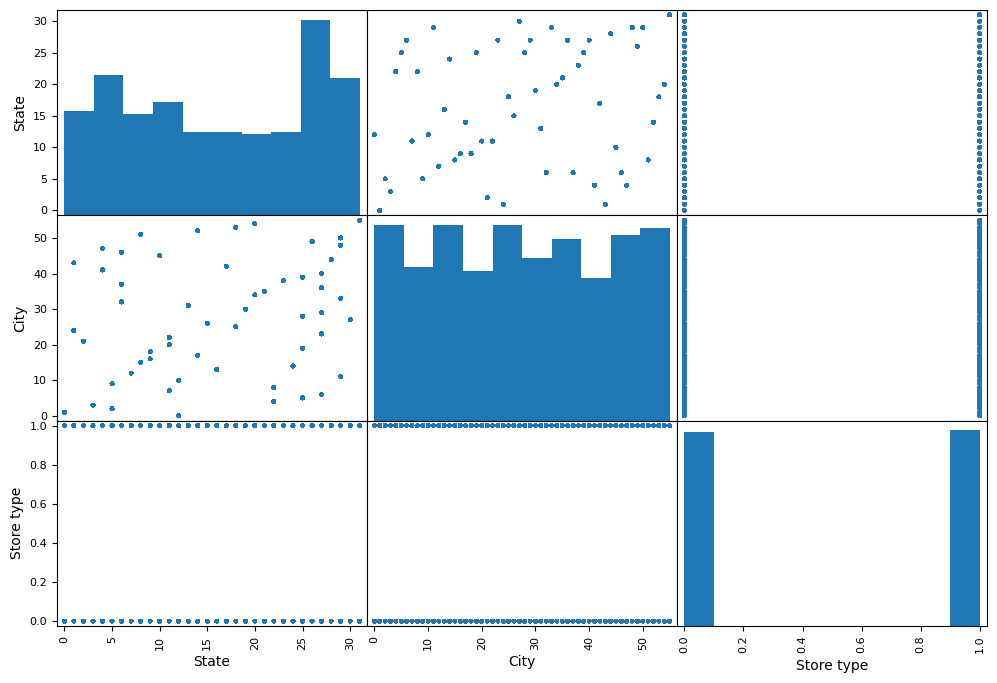

In [ ]:
atributos=["State", "City", "Store type"]

scatter_matrix(df[atributos],figsize=(12,8))

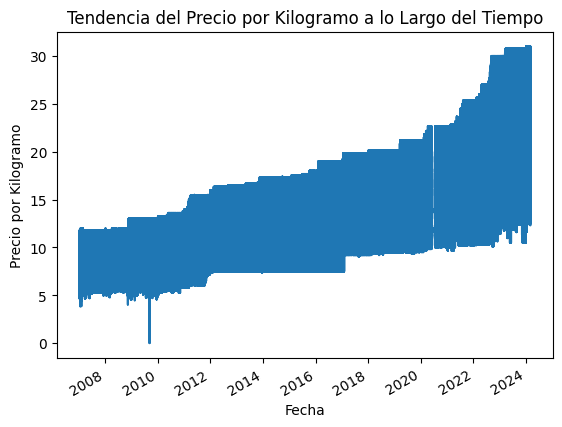

In [ ]:
df['Date']
df.sort_values('Date', inplace=True)

plot_params = {
    'kind': 'line',
    'title': 'Tendencia del Precio por Kilogramo a lo Largo del Tiempo',
    'xlabel': 'Fecha',
    'ylabel': 'Precio por Kilogramo'
}
df.set_index('Date')['Price per kilogram'].plot(**plot_params)
plt.show()

In [ ]:
corr_matrix = df.corr()
fig = px.imshow(corr_matrix, x = corr_matrix.columns, y = corr_matrix.columns, color_continuous_scale= 'RdBu', range_color = [-1,1],
                text_auto = True, aspect = 'auto', title = 'Matriz de Correlacion')
fig.update(layout_coloraxis_showscale = False)
fig.show()

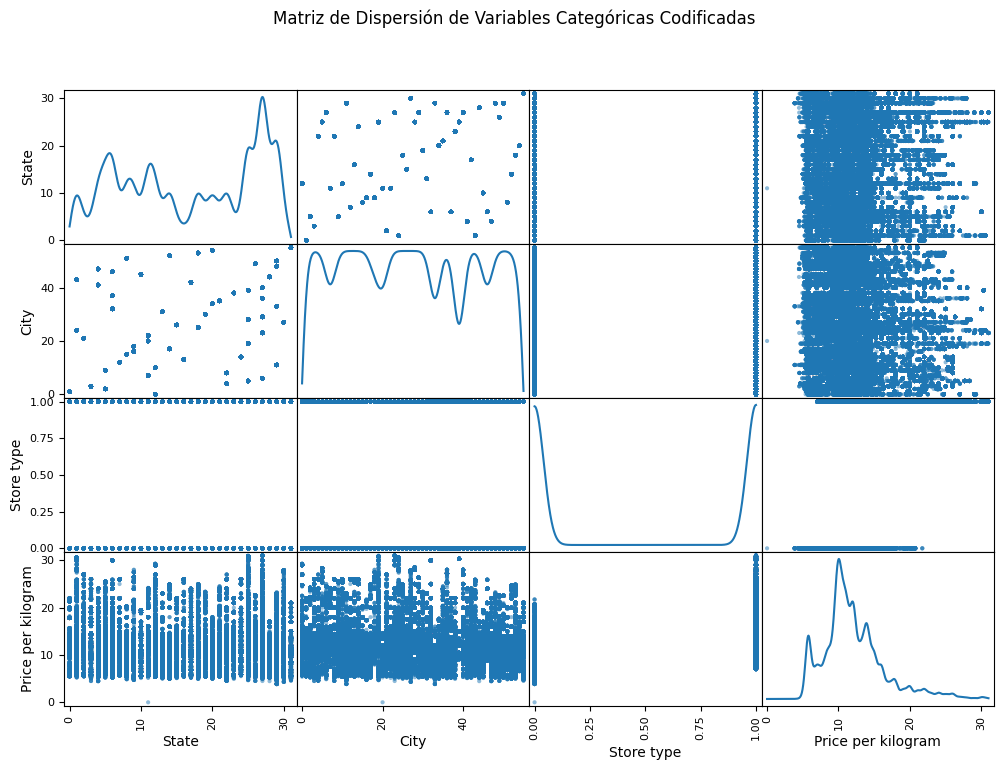

In [ ]:
atributos = ["State", "City", "Store type", "Price per kilogram"]
scatter_matrix(df[atributos], figsize=(12, 8), alpha=0.5, diagonal='kde')
plt.suptitle('Matriz de Dispersión de Variables Categóricas Codificadas')
plt.show()

# **SELECCION DE MODELOS Y ENTRENAMIENTO**

In [13]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.median()))

In [14]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df = pd.get_dummies(df, columns=categorical_cols)

In [15]:
X = df.drop('Price per kilogram', axis=1)  # Assuming 'Price per kilogram' is the target
y = df['Price per kilogram']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred_linear = linear_reg.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_linear)
print("Error cuadrático medio (Regresión Lineal):", mse_linear)

Error cuadrático medio (Regresión Lineal): 3.1550065215408702


In [ ]:
r2_lr = r2_score(y_test, y_pred_linear)

In [ ]:
print(f'Regresión Lineal - MSE: {mse_lr}, R2: {r2_lr}')

Regresión Lineal - MSE: 3.1550065215408702, R2: 0.8316115556503456


In [ ]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train,  y_train)
y_pred_rf = model_rf.predict(X_test)


In [ ]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [ ]:
print(f'Bosque Aleatorio - MSE: {mse_rf}, R2: {r2_rf}')

Bosque Aleatorio - MSE: 0.04091942447255191, R2: 0.9978160557882932


In [24]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [25]:
y_pred_dt = dt.predict(X_test)

In [26]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f'DecisionTree - MSE: {mse_dt}, R2: {r2_dt}')

DecisionTree - MSE: 0.0652355373086163, R2: 0.996518260558667


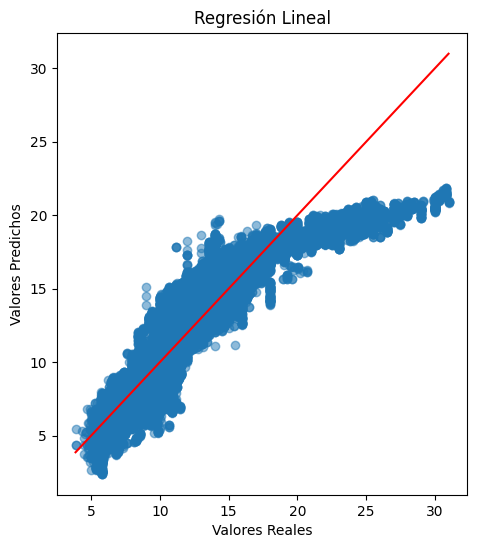

In [ ]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Regresión Lineal')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

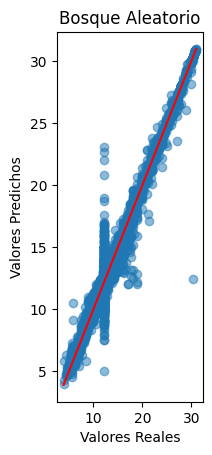

In [ ]:
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Bosque Aleatorio')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

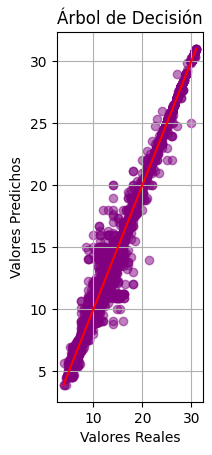

In [ ]:
# Árbol de Decisión
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_dt, alpha=0.5, color='purple')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Árbol de Decisión')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Línea de referencia
plt.grid(True)

In [ ]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Decision Tree'],
    'MSE': [mse_lr, mse_rf, mse_dt],
    'R2 Score': [r2_lr, r2_rf, r2_dt]
})

print(results)

               Model       MSE  R2 Score
0  Linear Regression  3.155007  0.831612
1      Random Forest  0.040919  0.997816
2      Decision Tree  0.065236  0.996518


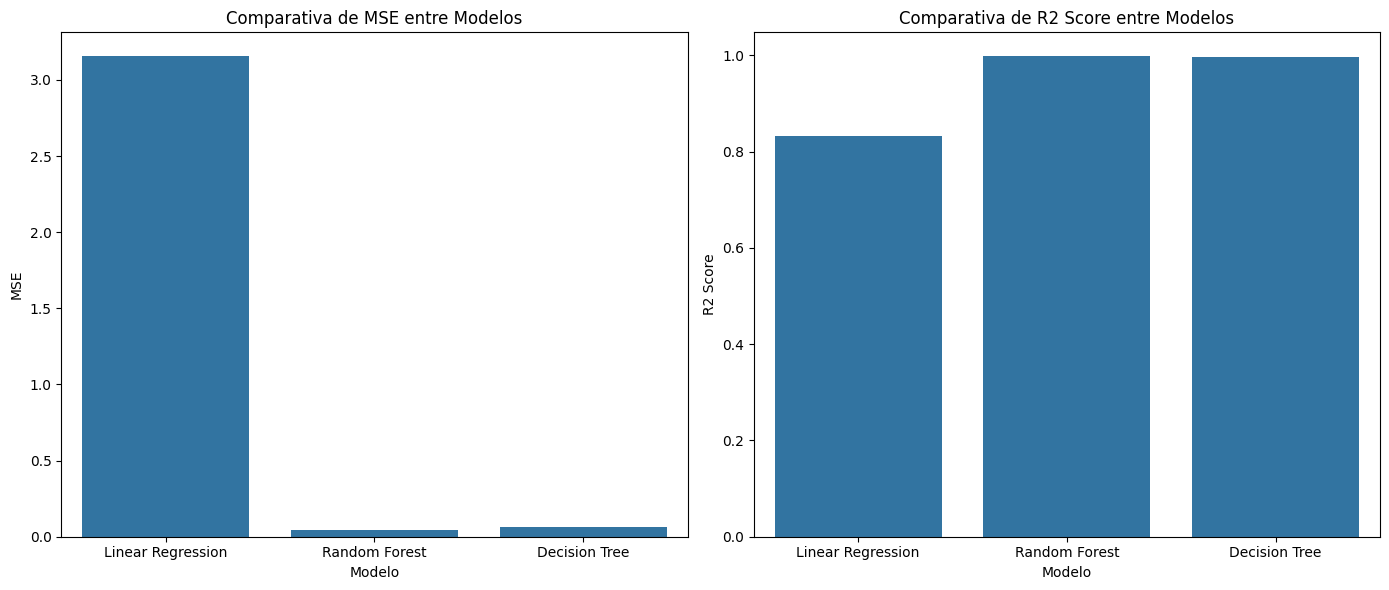

In [ ]:
plt.figure(figsize=(14, 6))

# Comparativa de MSE
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='MSE', data=results)
plt.title('Comparativa de MSE entre Modelos')
plt.xlabel('Modelo')
plt.ylabel('MSE')

# Comparativa de R2 Score
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='R2 Score', data=results)
plt.title('Comparativa de R2 Score entre Modelos')
plt.xlabel('Modelo')
plt.ylabel('R2 Score')

plt.tight_layout()
plt.show()


In [ ]:
# Crear DataFrame de resultados # Random Forest con Hiperparámetros
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Decision Tree', 'Random Forest (GridSearchCV)'],
    'MSE': [mse_lr, mse_rf, mse_dt, mse_grid_rf],
    'R2 Score': [r2_lr, r2_rf, r2_dt, r2_grid_rf]
})

print(results)